In [93]:
%matplotlib inline

In [94]:
pwd

u'/Users/octavia/model/basin'

In [114]:
if True: 
    import matplotlib.pylab as plt
    import numpy as np
    
    def myfloat(b):
        try: 
            b = float(b)
        except ValueError:
            b = [b for b in b.split('-') if b]
            b = float(b[0])*10**(-float(b[1]))
        return b
    
    t = []
    itp = []  #  print step
    it = []   #  time step
    f =  open("output/time.out", 'r')
    f.next()
    for line in f:
        a = (line.strip().split(" "))
        a = [b for b in a if b]
        t.append(float(a[0]))
        itp.append(int(a[1]))
        it.append(int(a[2]))

In [120]:
f =  open("output/meta.out", 'r')

slope = float(f.next().strip().split(" ")[-1])
h0 = 0.
for l in range(3):
    line = f.next()
    a = line.strip().split(" ")
    a = [b for b in a if b]
    h0 += float(a[-1])
    
prate = float(f.next().strip().split(" ")[-1])    
dt = float(f.next().strip().split(" ")[-1])

tmax = t[-1]
h0 = h0/3.
fmtstr = "h0={0:.2f}; dt={1:.1f}; slope={2:.2f}".format(h0, dt, slope)
prntstr = "_".join(fmtstr.strip().split("; "))
print fmtstr, "\t", prntstr


h0=0.39; dt=0.2; slope=0.25 	h0=0.39_dt=0.2_slope=0.25


In [98]:
ntstep = len(itp)
tmax = t[-1]
dt = (t[-1] - t[-2])/(it[-1] - it[-2])
hnorm = 0.4
case = "basin"

In [99]:
def get_dvol(fname):
    t = []
    dvol = []
    infl = [] 
    flux = []
    dt = []
    f = open(fname, 'r'); 
    for line in f:
        a = (line.strip().split(" "))
        a = [myfloat(b) for b in a if b]
        t.append(a[0])
        dvol.append(a[1])
        flux.append(a[2])
        infl.append(a[3])
        dt.append(a[4])
    t = np.array(t)
    dvol = np.array(dvol)
    flux = np.array(flux)
    infl = np.array(infl)
    total = dvol  - flux - infl
    return t, dvol, flux, infl, dt, total

In [100]:
# if prate > 0:
#     infl = infl - prate
#     precip = prate*np.ones(infl.shape)

In [102]:
# t_check, dvol_check, flux_check, infl_check, total_check  = get_dvol('dvol.out')
# print sum(dvol_check-dvol), sum(flux_check-flux), sum(infl_check-infl)

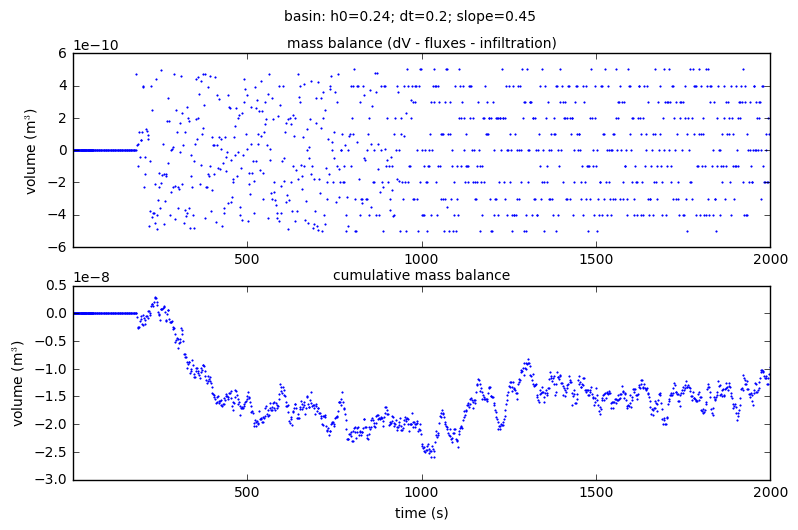

In [103]:
t, dvol, flux, infl, dt, total  = get_dvol('output/dvol.out')


ti = 0; tf =len(t)-1;  nprt = 10

f = plt.figure(figsize= (9,5.5))
plt.subplot(211)
plt.plot(t[ti:tf:nprt], dvol[ti:tf:nprt] - flux[ti:tf:nprt] - infl[ti:tf:nprt], '.', ms = 2)
# plt.plot(t[ti:tf:nprt**2], dvol[ti:tf:nprt**2] - flux[ti:tf:nprt**2] - infl[ti:tf:nprt**2], '.', ms = 6)
plt.title('mass balance (dV - fluxes - infiltration)', fontsize = 10)
plt.ylabel('volume (m$^3$)'); plt.xlim([t[ti], t[tf]])
plt.subplot(212)
plt.plot(t[ti:tf:nprt],np.cumsum(total)[ti:tf:nprt], '.', ms = 2)
plt.title('cumulative mass balance', fontsize = 10)
plt.xlabel('time (s)'); plt.ylabel('volume (m$^3$)');
plt.xlim([t[ti], t[tf]])
plt.suptitle('{1}: {0}'.format(fmtstr, case  ))
f.savefig('plots/dV_{0}.pdf'.format(prntstr))

In [104]:
## volume check
dVmax = np.zeros(len(total))
for i in range(len(total)-1):
    if np.abs(total[i+1]) > dVmax[i]:
        dVmax[i+1] = np.abs(total[i+1])
    else:
        dVmax[i+1] = dVmax[i]
cumTot = np.cumsum(total)
dV = np.zeros(len(cumTot))
for i in range(len(cumTot)-1):
    if np.abs(cumTot[i+1]) > dV[i]:
        dV[i+1] = np.abs(cumTot[i+1])
    else:
        dV[i+1] = dV[i]            

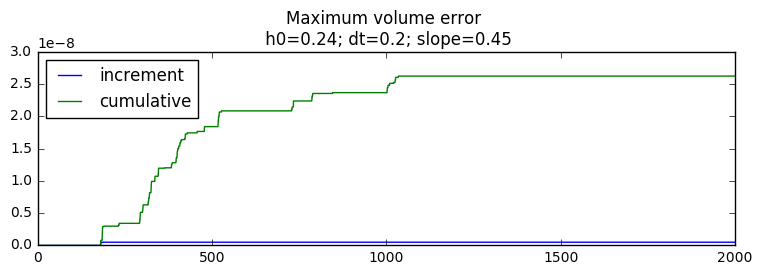

In [105]:
fig = plt.figure(figsize= (9,5.5))
plt.subplot(211)
plt.plot(t, dVmax, label = 'increment')
plt.plot(t, dV, label= 'cumulative')
plt.legend(loc = 'best')
plt.title('Maximum volume error \n {0}'.format(fmtstr))
fig.savefig('plots/dVmax_{0}.pdf'.format(prntstr))

In [106]:
def allfluxes():
    t = []; 
    flux1 = [];
    flux2 = [];
    flux3 = [];
    flux4 = [];    
    f = open("output/allfluxes.out", 'r'); 
    for line in f:
        a = (line.strip().split(" "))
        a = [myfloat(b) for b in a if b]
        flux1.append(a[0])
        flux2.append(a[1])
        flux3.append(a[2])
        flux4.append(a[3])
    flux1 = np.array(flux1)
    flux2 = np.array(flux2)
    flux3 = np.array(flux3)
    flux4 = np.array(flux4)    
    return flux1, flux2, flux3, flux4

In [107]:
flux1, flux2, flux3, flux4 = allfluxes()

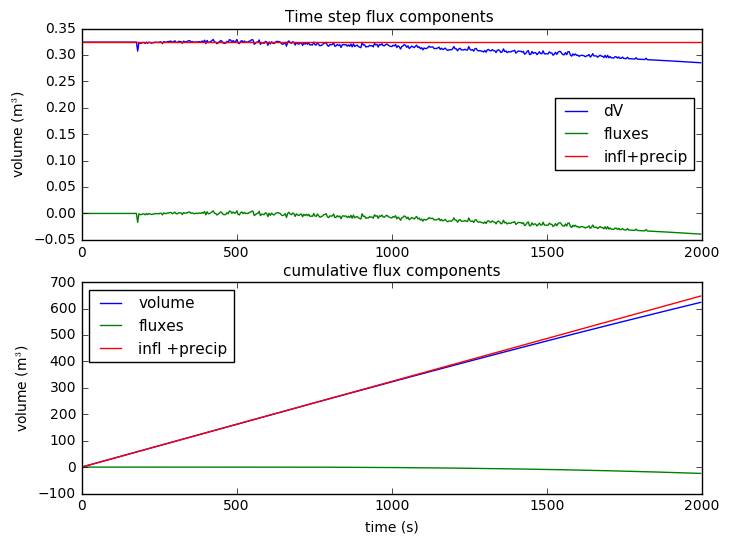

In [121]:
## all fluxes
#  precip - positive, infl - negative
t, dvol, flux, infl, dt, total  = get_dvol('output/dvol.out')

ti =1; tf = len(t)+1;  nprt = 20
f = plt.figure(figsize= (8,6))
plt.subplot(211)
plt.plot(t[ti:tf:nprt], dvol[ti:tf:nprt]/dt[ti:tf:nprt],  label = 'dV')
plt.plot(t[ti:tf:nprt], flux[ti:tf:nprt]/dt[ti:tf:nprt], label = 'fluxes')
plt.plot(t[ti:tf:nprt], infl[ti:tf:nprt]/dt[ti:tf:nprt], label = 'infl+precip')
plt.title('Time step flux components ', fontsize = 11)
plt.ylabel('volume (m$^3$)')
plt.legend(loc = 'best', fontsize= 11)

plt.subplot(212)
plt.plot(t[ti:tf:nprt], np.cumsum(dvol)[ti:tf:nprt], label = 'volume')
plt.plot(t[ti:tf:nprt], np.cumsum(flux)[ti:tf:nprt], label = 'fluxes')
plt.plot(t[ti:tf:nprt], np.cumsum(infl)[ti:tf:nprt],  label = 'infl +precip')
plt.legend(loc = 'best', fontsize= 11)
plt.title('cumulative flux components', fontsize = 11)
plt.ylabel('volume (m$^3$)'); plt.xlabel('time (s)')

In [109]:
f = []
ts = []
fdum = np.zeros([95 ]) 

for line in open("output/fluxes.out", 'r'):
    a = (line.strip().split(" "))
    try:
        a = [str(b) for b in a if b]        
        j = int(a[0])
        k = int(a[1])
        fdum[j] = a[2]   
    except ValueError:
        dumt = int(a[0])
        ts.append(float(a[1]))
        f.append(fdum.copy())
        fdum = np.zeros([95 ]) 
f = np.array(f)
ts = np.array(ts)
nfstep = len(f)      

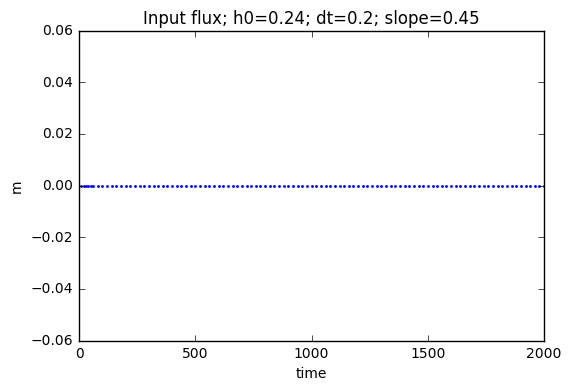

In [110]:
#  check influx again?
fig = plt.figure()
plt.plot(ts,f.sum(1), '.', ms = 3)
plt.title('Input flux; {0}'.format( fmtstr))
plt.xlabel('time'); plt.ylabel('m')

fig.savefig('plots/flux3_{0}.pdf'.format(prntstr))

In [111]:
nrow = 63
ncol = 94
area =  np.zeros([ncol+2, nrow+2])

for line in open("output/area.out", 'r'):
    a = (line.strip().split(" "))
    a = [float(b) for b in a if b]
    j = int(a[0])
    k = int(a[1])
    area[j,k] = a[2]

In [112]:
np.sum(area)*.05*.25

291.82499999999999

In [113]:
print np.cumsum(infl)[-1]
print np.cumsum(dvol)[-1]
print np.cumsum(flux)[-1]

648.5
624.42099753
-24.0790024597
